## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x/255
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUMS = [0.9, 0.95]

In [7]:
results = {}
for lr in LEARNING_RATE:
    for mome in MOMENTUMS:
        for nes in [True, False]:
            keras.backend.clear_session() # 把舊的 Graph 清掉
            model = build_mlp(input_shape=x_train.shape[1:])
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=nes, momentum=mome)
            model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
            model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
            # Collect results
            train_loss = model.history.history["loss"]
            valid_loss = model.history.history["val_loss"]
            train_acc = model.history.history["acc"]
            valid_acc = model.history.history["val_acc"]
    
            exp_name_tag = "lr:%s Momentum:%f Nestrov:%s" % (str(lr), mome, nes)
            results[exp_name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 'train-acc': train_acc, 'valid-acc': valid_acc}








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/50





50000/50000 [==============================] - 22s 449us/step - loss: 2.1376 - acc: 0.2118 - val_loss: 1.9305 - val_acc: 0.2859
Epoch 2/50
50000/50000 [==============================] - 33s 660us/step - loss: 1.8451 - acc: 0.3307 - val_loss: 1.9438 - val_acc: 0.2989
Epoch 3/50
50000/50000 [==============================] - 57s 1ms/step - loss: 1.7467 - acc: 0.3711 - val_loss: 1.8124 - val_acc: 0.3557
Epoch 4/50
50000/50000 [==============================] - 24s 474us/step - loss: 1.6939 - acc: 0.3938 - val_loss: 1.6997 - val_acc: 0.3952
Epoch 5/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.6651 - acc: 0.4042 - val_loss: 1.6705 - val_acc: 0.4040
Epoch 6/50
50000/50000 [==============================] - 14s 288us/step - loss: 1.6112 - acc: 0.4220 - val_loss: 1.7066 - val_acc: 0.3996
Epoch 7/5

50000/50000 [==============================] - 8s 157us/step - loss: 1.2934 - acc: 0.5372 - val_loss: 1.5350 - val_acc: 0.4791
Epoch 35/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.2870 - acc: 0.5384 - val_loss: 1.5637 - val_acc: 0.4672
Epoch 36/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.2798 - acc: 0.5385 - val_loss: 1.5895 - val_acc: 0.4619
Epoch 37/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.2770 - acc: 0.5429 - val_loss: 1.6186 - val_acc: 0.4501
Epoch 38/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.2672 - acc: 0.5471 - val_loss: 1.6498 - val_acc: 0.4436
Epoch 39/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.2526 - acc: 0.5512 - val_loss: 1.7704 - val_acc: 0.4232
Epoch 40/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.2532 - acc: 0.5505 - val_loss: 1.6492 - val_acc: 0.4496
Epoch 41/50
50000/50000 [==============

Epoch 43/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.2630 - acc: 0.5492 - val_loss: 1.5324 - val_acc: 0.4808
Epoch 44/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.2553 - acc: 0.5497 - val_loss: 1.6127 - val_acc: 0.4618
Epoch 45/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.2643 - acc: 0.5465 - val_loss: 1.6788 - val_acc: 0.4628
Epoch 46/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.2707 - acc: 0.5454 - val_loss: 1.5675 - val_acc: 0.4727
Epoch 47/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.2547 - acc: 0.5514 - val_loss: 1.6281 - val_acc: 0.4688
Epoch 48/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.2597 - acc: 0.5477 - val_loss: 1.5842 - val_acc: 0.4595
Epoch 49/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.2425 - acc: 0.5555 - val_loss: 1.6847 - val_acc: 0.4534
Epoch 50/50
50000/50000 [==

50000/50000 [==============================] - 9s 188us/step - loss: 2.0468 - acc: 0.2340 - val_loss: 1.9284 - val_acc: 0.2885
Epoch 2/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.9158 - acc: 0.2880 - val_loss: 1.9409 - val_acc: 0.3220
Epoch 3/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.8532 - acc: 0.3240 - val_loss: 1.8579 - val_acc: 0.3123
Epoch 4/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.8849 - acc: 0.3127 - val_loss: 1.9722 - val_acc: 0.3033
Epoch 5/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.8831 - acc: 0.3123 - val_loss: 1.8782 - val_acc: 0.2950
Epoch 6/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.8528 - acc: 0.3199 - val_loss: 1.8134 - val_acc: 0.3384
Epoch 7/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.8951 - acc: 0.3093 - val_loss: 1.9290 - val_acc: 0.2861
Epoch 8/50
50000/50000 [====================

50000/50000 [==============================] - 8s 159us/step - loss: 1.2989 - acc: 0.5390 - val_loss: 1.3861 - val_acc: 0.5095
Epoch 10/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.2757 - acc: 0.5484 - val_loss: 1.3889 - val_acc: 0.5135
Epoch 11/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.2422 - acc: 0.5592 - val_loss: 1.3649 - val_acc: 0.5159
Epoch 12/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.2143 - acc: 0.5727 - val_loss: 1.3727 - val_acc: 0.5185
Epoch 13/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.1869 - acc: 0.5808 - val_loss: 1.3933 - val_acc: 0.5107
Epoch 14/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.1664 - acc: 0.5890 - val_loss: 1.3676 - val_acc: 0.5166
Epoch 15/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.1395 - acc: 0.5993 - val_loss: 1.4168 - val_acc: 0.5120
Epoch 16/50
50000/50000 [==============

Epoch 18/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.1467 - acc: 0.5925 - val_loss: 1.3405 - val_acc: 0.5295
Epoch 19/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.1342 - acc: 0.5972 - val_loss: 1.3573 - val_acc: 0.5246
Epoch 20/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.1154 - acc: 0.6038 - val_loss: 1.3496 - val_acc: 0.5275
Epoch 21/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.0974 - acc: 0.6096 - val_loss: 1.3411 - val_acc: 0.5303
Epoch 22/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.0721 - acc: 0.6184 - val_loss: 1.3941 - val_acc: 0.5163
Epoch 23/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.0570 - acc: 0.6246 - val_loss: 1.3631 - val_acc: 0.5330
Epoch 24/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.0357 - acc: 0.6305 - val_loss: 1.3965 - val_acc: 0.5209
Epoch 25/50
50000/50000 [=

50000/50000 [==============================] - 8s 162us/step - loss: 0.8098 - acc: 0.7106 - val_loss: 1.4356 - val_acc: 0.5315
Epoch 27/50
50000/50000 [==============================] - 8s 160us/step - loss: 0.7874 - acc: 0.7201 - val_loss: 1.5262 - val_acc: 0.5256
Epoch 28/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.7598 - acc: 0.7273 - val_loss: 1.4850 - val_acc: 0.5356
Epoch 29/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.7469 - acc: 0.7333 - val_loss: 1.4731 - val_acc: 0.5415
Epoch 30/50
50000/50000 [==============================] - 8s 163us/step - loss: 0.7148 - acc: 0.7453 - val_loss: 1.6127 - val_acc: 0.5300
Epoch 31/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.7014 - acc: 0.7494 - val_loss: 1.6939 - val_acc: 0.5105
Epoch 32/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.6766 - acc: 0.7585 - val_loss: 1.6355 - val_acc: 0.5321
Epoch 33/50
50000/50000 [==============

Epoch 35/50
50000/50000 [==============================] - 7s 149us/step - loss: 0.8314 - acc: 0.7013 - val_loss: 1.4385 - val_acc: 0.5356
Epoch 36/50
50000/50000 [==============================] - 12s 247us/step - loss: 0.8170 - acc: 0.7048 - val_loss: 1.5043 - val_acc: 0.5176
Epoch 37/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.8068 - acc: 0.7105 - val_loss: 1.4741 - val_acc: 0.5279
Epoch 38/50
50000/50000 [==============================] - 7s 147us/step - loss: 0.8115 - acc: 0.7085 - val_loss: 1.5052 - val_acc: 0.5265
Epoch 39/50
50000/50000 [==============================] - 8s 151us/step - loss: 0.7984 - acc: 0.7117 - val_loss: 1.5165 - val_acc: 0.5304
Epoch 40/50
50000/50000 [==============================] - 7s 149us/step - loss: 0.7629 - acc: 0.7257 - val_loss: 1.5651 - val_acc: 0.5179
Epoch 41/50
50000/50000 [==============================] - 7s 147us/step - loss: 0.7376 - acc: 0.7364 - val_loss: 1.5443 - val_acc: 0.5353
Epoch 42/50
50000/50000 [=

50000/50000 [==============================] - 8s 165us/step - loss: 1.1879 - acc: 0.5848 - val_loss: 1.3774 - val_acc: 0.5089
Epoch 44/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.1791 - acc: 0.5857 - val_loss: 1.3675 - val_acc: 0.5124
Epoch 45/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.1698 - acc: 0.5897 - val_loss: 1.3665 - val_acc: 0.5146
Epoch 46/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.1626 - acc: 0.5919 - val_loss: 1.3414 - val_acc: 0.5229
Epoch 47/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.1539 - acc: 0.5946 - val_loss: 1.3509 - val_acc: 0.5169
Epoch 48/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.1477 - acc: 0.5966 - val_loss: 1.3469 - val_acc: 0.5174
Epoch 49/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.1380 - acc: 0.6019 - val_loss: 1.3413 - val_acc: 0.5258
Epoch 50/50
50000/50000 [==============

50000/50000 [==============================] - 8s 152us/step - loss: 2.0223 - acc: 0.2789 - val_loss: 1.8636 - val_acc: 0.3416
Epoch 2/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.8030 - acc: 0.3686 - val_loss: 1.7526 - val_acc: 0.3884
Epoch 3/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.7168 - acc: 0.3991 - val_loss: 1.6813 - val_acc: 0.4083
Epoch 4/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6580 - acc: 0.4183 - val_loss: 1.6329 - val_acc: 0.4268
Epoch 5/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.6096 - acc: 0.4383 - val_loss: 1.5902 - val_acc: 0.4406
Epoch 6/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5706 - acc: 0.4487 - val_loss: 1.5664 - val_acc: 0.4502
Epoch 7/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.5371 - acc: 0.4618 - val_loss: 1.5453 - val_acc: 0.4529
Epoch 8/50
50000/50000 [=====================

Epoch 10/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.4888 - acc: 0.4758 - val_loss: 1.5408 - val_acc: 0.4519
Epoch 11/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.4683 - acc: 0.4839 - val_loss: 1.4893 - val_acc: 0.4721
Epoch 12/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.4564 - acc: 0.4856 - val_loss: 1.4693 - val_acc: 0.4782
Epoch 13/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.4260 - acc: 0.4982 - val_loss: 1.4778 - val_acc: 0.4765
Epoch 14/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4159 - acc: 0.4999 - val_loss: 1.4421 - val_acc: 0.4898
Epoch 15/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.3972 - acc: 0.5084 - val_loss: 1.4299 - val_acc: 0.4959
Epoch 16/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.3741 - acc: 0.5184 - val_loss: 1.4384 - val_acc: 0.4961
Epoch 17/50
50000/50000 [==

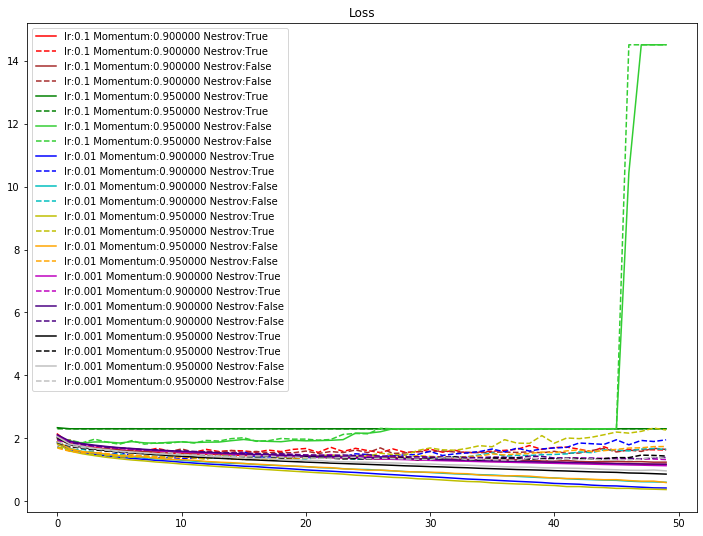

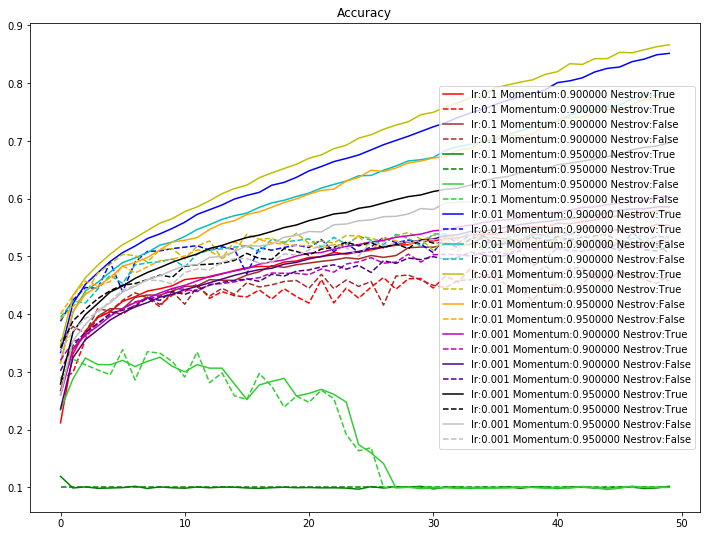

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "brown", "g", "limegreen", "b", "c", "y", "orange", "m", "indigo", "k", "silver"]

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()